In [1]:
import os
print(os.getcwd())

C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2


In [2]:
# Cell 1 - File Check
import os
folder_path = 'EDA_Analysis_2'
print(sorted(os.listdir(r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2')))

['.ipynb_checkpoints', 'EDA_Analysis_2', 'Regression Analysis Task1.ipynb', 'Time Series Analysis Task 2.ipynb', 'Untitled.ipynb', 'cleaned_stock_prices.csv', 'linear_model_simple.pkl', 'moving_averages.png', 'predictions.csv', 'regression_scatter.png', 'ts_plot.png']


In [3]:
file_path = r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2'

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File not found. Please check the folder name or file path.")


File exists!


In [4]:
# Check current working directory
print("Current working directory:")
cwd = os.getcwd()
print(cwd)
print("-"*50)

# Define the folder path where your CSV is
folder_path = r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2'

# List all files in the folder safely
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    print(f"Files in folder '{folder_path}':")
    files = sorted(os.listdir(folder_path))
    print(files)
else:
    print(f"Folder '{folder_path}' not found or is not a directory!")
print("-"*50)

# Check if the specific CSV file exists
file_name = 'cleaned_stock_prices.csv'
file_path = os.path.join(folder_path, file_name)

if os.path.exists(file_path) and os.path.isfile(file_path):
    print(f"File '{file_name}' exists in the folder!")
else:
    print(f"File '{file_name}' NOT found in the folder. Please check the name.")
print("-"*50)

# Read the CSV file safely
if os.path.exists(file_path) and os.path.isfile(file_path):
    try:
        df = pd.read_csv(file_path)
        print("CSV file read successfully! Showing first 5 rows:")
        print(df.head())
    except Exception as e:
        print("Error reading CSV file:", e)


Current working directory:
C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2
--------------------------------------------------
Files in folder 'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2':
['.ipynb_checkpoints', 'EDA_Analysis_2', 'Regression Analysis Task1.ipynb', 'Time Series Analysis Task 2.ipynb', 'Untitled.ipynb', 'cleaned_stock_prices.csv', 'linear_model_simple.pkl', 'moving_averages.png', 'predictions.csv', 'regression_scatter.png', 'ts_plot.png']
--------------------------------------------------
File 'cleaned_stock_prices.csv' exists in the folder!
--------------------------------------------------
Error reading CSV file: name 'pd' is not defined


In [5]:
!pip install statsmodels

In [6]:
# Cell 2 - Import required libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import os

In [7]:
# Cell 3 - Load CSV file 
path = r'Load data and inspect'
df = pd.read_csv(path)
print("Shape:", df.shape)
print("\nColumns & dtypes:")
print(df.dtypes)
display(df.head(6))

Shape: (497472, 7)

Columns & dtypes:
symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


,symbol,date,open,high,low,close,volume
0,aal,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,aapl,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,aap,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,abbv,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,abc,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
5,abt,2014-01-02,38.0900,38.4000,38.0000,38.2300,4967472


In [8]:
# Cell 4 - List all symbols and pick one symbol
if 'symbol' in df.columns:
    symbols = df['symbol'].dropna().unique()
    print("Number of unique sybmols:", len(symbols))
    print("Frist 10 symbols:",  symbols[10])
    chosen_symbol = symbols[0]
    print("chosen symbol for demo:", chosen_symbol)
else:
    chosen_symbol = None
    print("No symbol column - will use aggregated series by date.")
    

Number of unique sybmols: 505
Frist 10 symbols: adp
chosen symbol for demo: aal


In [9]:
import pandas as pd
file_path = r"C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2\cleaned_stock_prices.csv"
df = pd.read_csv(file_path)
print("File loaded successfully!")
print(df.head())

File loaded successfully!
  symbol        date      open      high       low     close    volume
0    aal  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   aapl  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    aap  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   abbv  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    abc  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391


In [10]:
# Cell 5 - Prepare the time series filter symbol, convert date, group by date
# frist we prepare series
chosen_symbol = 'aap'
if chosen_symbol is not None:
    df_sym = df[df['symbol']== chosen_symbol].copy()
else:
    dy_sym = df.copy()

# now convert date in datetime and drop rows without date 
df_sym['date'] = pd.to_datetime(df_sym['date'], errors='coerce')
df_sym = df_sym.dropna(subset=['date']).set_index('date').sort_index()

# if multiple entries per date, aggregate by mean
ts = df_sym['close'].groupby(df_sym.index).mean().sort_index()

print("Chosen symbol:", chosen_symbol)
print("Series length (unique dates):", len(ts))
if len(ts)==0:
    print("Warning: time series is empty - check chosen_symbol or csv contens.")
else:    
    print("Date range:", ts.index.min().date(), "to", ts.index.max().date())
    print("first 5 values:")
    display(ts.head())
    print("Last 5 values:")
    display(ts.tail())

Chosen symbol: aap
Series length (unique dates): 1007
Date range: 2014-01-02 to 2017-12-29
first 5 values:


date
2014-01-02    109.74
2014-01-03    112.88
2014-01-06    111.80
2014-01-07    113.18
2014-01-08    112.30
Name: close, dtype: float64

Last 5 values:


date
2017-12-22    100.55
2017-12-26    101.96
2017-12-27     99.77
2017-12-28     99.71
2017-12-29     99.69
Name: close, dtype: float64

In [11]:
# Cell 6 - Checking median gap between consecutive dates and then choose period
median_gap = ts.index.to_series().diff().median()
median_days = int(median_gap.total_seconds() / 86400) if pd.notnull(median_gap) else None
print("Median gap (days):", median_days)

if median_days is None:
    period = 30
elif median_days <= 1:
    period = 252
elif median_days <= 7:
    period = 52
else:
    period = 12
print("Chosen decomposition period:", period)

Median gap (days): 1
Chosen decomposition period: 252


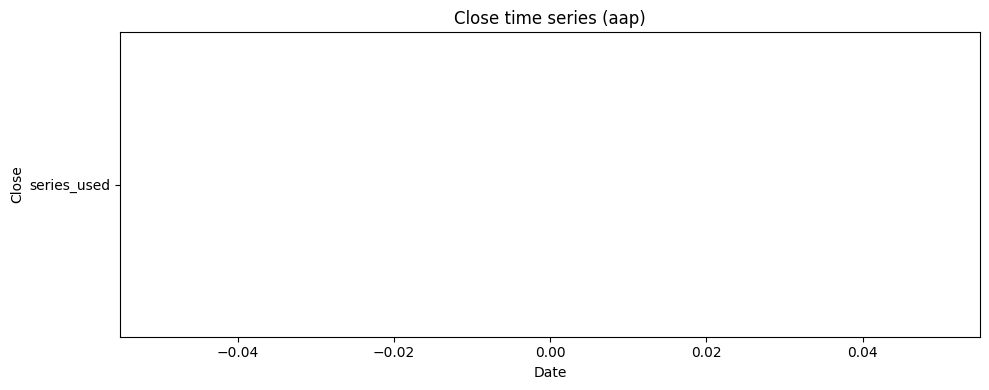

Saved: C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/ts_plot.png


In [12]:
# Cell 7 - Making Plot time series and save them 
plt.figure(figsize=(10,4))
plt.plot('series_used')
plt.title(f"Close time series ({chosen_symbol or 'aggregate'})")
plt.xlabel("Date")
plt.ylabel("Close")
plt.tight_layout()
out1 = r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/ts_plot.png'
plt.savefig(out1)
plt.show()
print("Saved:", out1)

In [13]:
series_used = df_sym['close'].groupby(df_sym.index).mean().sort_index()
print("Series has been created")
print(series_used.head())

Series has been created
date
2014-01-02    109.74
2014-01-03    112.88
2014-01-06    111.80
2014-01-07    113.18
2014-01-08    112.30
Name: close, dtype: float64


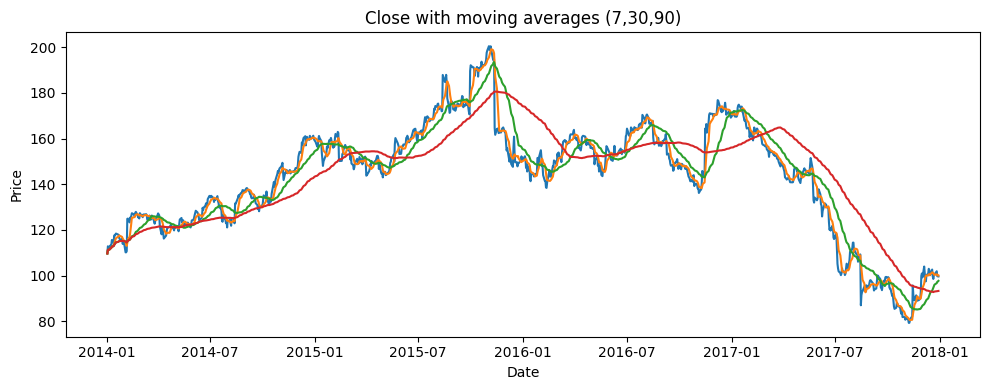

Saved: C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/moving_averages.png


In [14]:
# Cell 8 - Moving averages and plot saving 
ma_windows = [7,30,90]
ma_df = pd.DataFrame({'close': series_used})
for w in ma_windows:
    ma_df[f'ma_{w}'] = ma_df['close'].rolling(window=w, min_periods=1).mean()

plt.figure(figsize=(10,4))
plt.plot(ma_df['close'])
for w in ma_windows:
    plt.plot(ma_df[f'ma_{w}'])
plt.title("Close with moving averages (7,30,90)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
out2 = r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/moving_averages.png'
plt.savefig(out2)
plt.show()
print("Saved:", out2)

Saved components CSV: C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/decomposition_components.csv


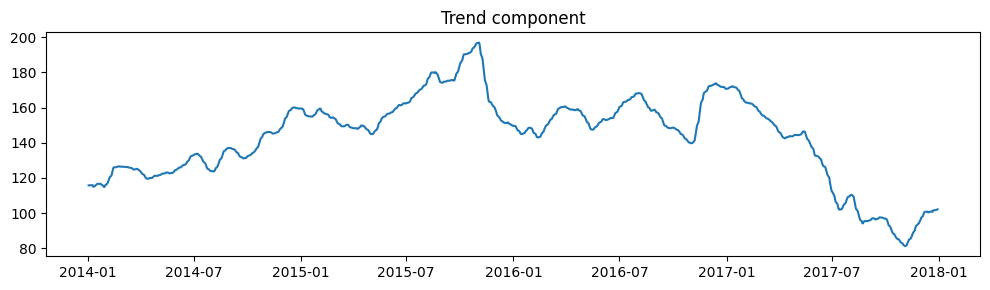

Saved: C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/trend.png


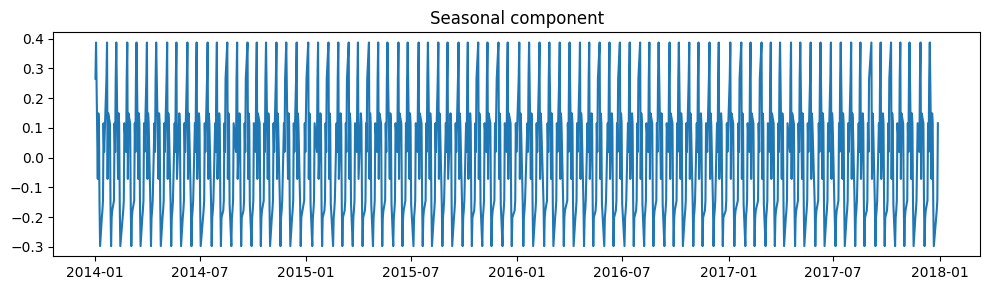

Saved: C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/seasonal.png


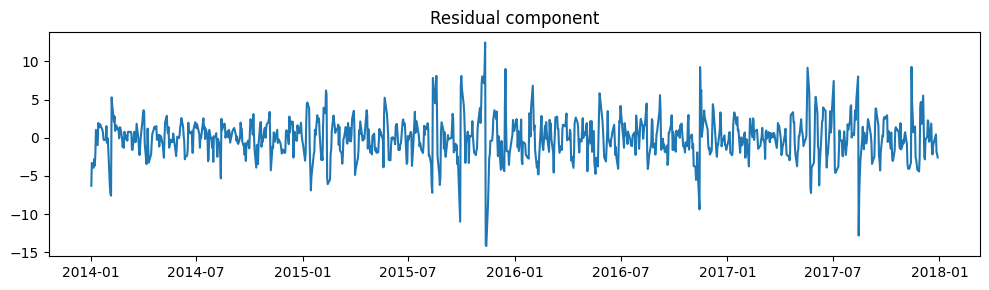

Saved: C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/residual.png


In [20]:
# Cell 9 - Seasonal decomposition and we save components separately
from statsmodels.tsa.seasonal import seasonal_decompose

period = 12

base_dir = r"C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2"
os.makedirs(base_dir, exist_ok=True)

if len(series_used) < 2 * period:
    print("WARNING: series length < 2 * period; decomposition may be unreliable (but will still try).")
decomposition = None
try:
    decomposition = seasonal_decompose(series_used, model='additive', period=period, extrapolate_trend='freq')
    comp_df = pd.DataFrame({
        'observed': decomposition.observed,
        'trend': decomposition.trend,
        'seasonal': decomposition.seasonal,
        'resid': decomposition.resid
    })
    comp_csv = os.path.join(base_dir, r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/decomposition_components.csv') 
    comp_df.to_csv(comp_csv, index=True)
    print("Saved components CSV:", comp_csv)
    
    plt.figure(figsize=(10,3))
    plt.plot(decomposition.trend)
    plt.title('Trend component')
    plt.tight_layout()
    tpath = r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/trend.png'
    plt.savefig(tpath)
    plt.show()
    print("Saved:", tpath)

    plt.figure(figsize=(10,3))
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal component')
    plt.tight_layout()
    spath = r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/seasonal.png'
    plt.savefig(spath)
    plt.show()
    print("Saved:", spath)

    plt.figure(figsize=(10,3))
    plt.plot(decomposition.resid)
    plt.title('Residual component')
    plt.tight_layout()
    rpath = r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/residual.png'
    plt.savefig(rpath)
    plt.show()
    print("Saved:", rpath)

except Exception as e:
    print("Decomposition error:", e)
    decomposition = None

In [32]:
# Cell 10 - Saving outputs to a results folder and making zip
import os
import shutil     
from zipfile import ZipFile

src_dir = r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2'

outdir  = './my_time_series_results'
os.makedirs(outdir, exist_ok=True)

files_to_copy = [
    r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/ts_plot.png',
    r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/moving_averages.png',
    r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/decomposition_components.csv',
    r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/trend.png',
    r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/seasonal.png',
    r'C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/residual.png'
]

for f in files_to_copy:
    src_file = os.path.join(src_dir, f)
    if os.path.exists(src_file):
        shutil.copy (src_file, outdir)
        print("Copied availabel files to", f)
    else:
        print("File not found, skipping:", f)

zip_filename = 'my_time_series_results.zip'
with ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(outdir):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, outdir)  # relative path in zip
            zipf.write(file_path, arcname)

print(f"Created zip file: {zip_filename}")

Copied availabel files to C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/ts_plot.png
Copied availabel files to C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/moving_averages.png
Copied availabel files to C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/decomposition_components.csv
Copied availabel files to C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/trend.png
Copied availabel files to C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/seasonal.png
Copied availabel files to C:\Users\Love\Desktop\EDA analysis\EDA_Analysis_2/residual.png
Created zip file: my_time_series_results.zip
